In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch

In [8]:
data = pd.read_csv('./demo-datasets/mall_customers.csv')

In [9]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
x = data[data.columns[3:5]]

In [11]:
x.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


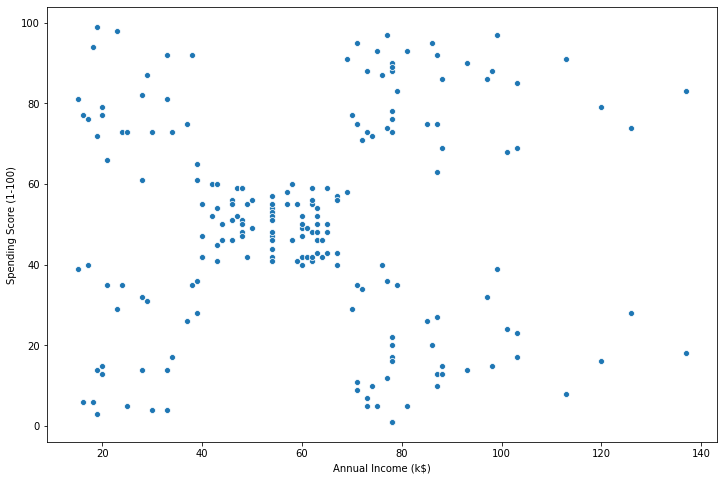

In [12]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x[x.columns[0]], x[x.columns[1]])

Text(0, 0.5, 'Distance')

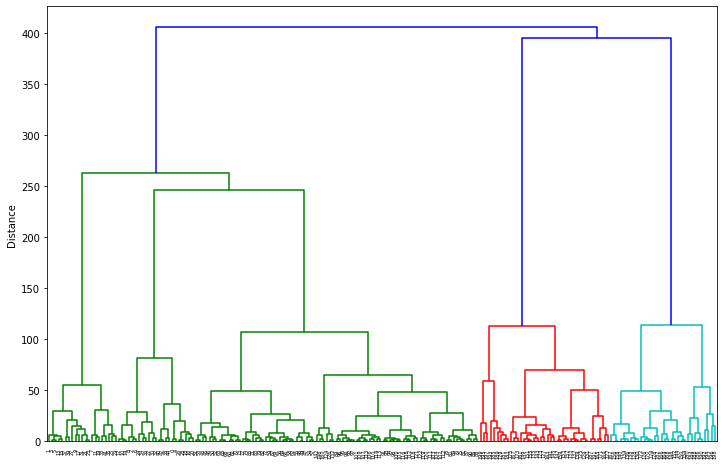

In [16]:
plt.figure(figsize=(12, 8))
dendrogram = sch.dendrogram(sch.linkage(x, method='ward'))
plt.ylabel('Distance')

In [17]:
from sklearn.cluster import AgglomerativeClustering

In [18]:
ac = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')

In [19]:
y_clusters = ac.fit_predict(x)

In [22]:
np.unique(y_clusters)

array([0, 1, 2, 3, 4], dtype=int64)

In [23]:
y_clusters

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

In [24]:
data['cluster'] = y_clusters

In [25]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


Text(0, 0.5, 'Spending Score (1-100)')

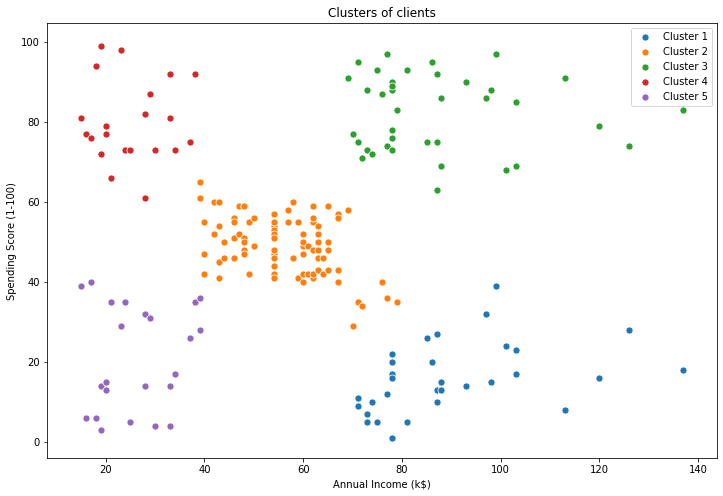

In [27]:
plt.figure(figsize=(12, 8))
sns.scatterplot('Annual Income (k$)', 'Spending Score (1-100)', data=x.loc[data['cluster'] == 0], label='Cluster 1', s=50)
sns.scatterplot('Annual Income (k$)', 'Spending Score (1-100)', data=x.loc[data['cluster'] == 1], label='Cluster 2', s=50)
sns.scatterplot('Annual Income (k$)', 'Spending Score (1-100)', data=x.loc[data['cluster'] == 2], label='Cluster 3', s=50)
sns.scatterplot('Annual Income (k$)', 'Spending Score (1-100)', data=x.loc[data['cluster'] == 3], label='Cluster 4', s=50)
sns.scatterplot('Annual Income (k$)', 'Spending Score (1-100)', data=x.loc[data['cluster'] == 4], label='Cluster 5', s=50)
plt.title('Clusters of clients')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')